# PS19 Sep - more wordplay
Below you find some useful functions for the following applications (Zipf's law & Markov analysis)

In [1]:
# useful functions:

"""Split a String into an Array of Strings, removing whitespace and deleting empty values"""
function splitphrase(phrase)
   split(phrase,keepempty=false)
end

"""Iterate over the Chars in a String and return the letters only of the original String"""
function cleanword(word)
    newword = ""
    for ltr in lowercase(word)
        if isletter(ltr)
            newword = newword*ltr
        end
    end
    return newword
end

"""
Opens a .txt file and returns a cleaned list of chronologically occuring words in the text
Useful for other applications...
"""
function readbook(filename)
    book = readlines(filename)
    wordlist = []
    for line in book
        append!(wordlist,splitphrase(line))
    end
    return cleanword.(wordlist)
end

"""Takes a list of words and returns a dictionay with the words as keys and their frequency as values """
function makehist(list)
    hist = Dict()
    for item in list
        hist[item] = get(hist,item,0) + 1
    end
    return hist
end

makehist (generic function with 1 method)

In [ ]:
using Pkg
Pkg.add("Plots")
using Plots
x = length(hey)
plot(x,hey)

### Zipf's law

The “rank” of a word is its position in an array of words sorted by frequency: the most common word has rank 1, the second most common has rank 2, etc.

Zipf’s law describes a relationship between the ranks and frequencies of words in natural languages [(cf. Wikipedia)](https://en.wikipedia.org/wiki/Zipf's_law). Specifically, it predicts that the frequency, $f$ of the word with rank $r$ is:
\begin{equation}
f=cr^{−s}
\end{equation}
where $s$ and $c$ are parameters that depend on the language and the text. If you take the logarithm of both sides of this equation, you get:
\begin{equation}
\log{f}=\log{c}-s\log{r}
\end{equation}

So if you plot $\log{f}$ versus $\log{r}$, you should get a straight line with slope $−s$ and intercept $\log{c}$. For the linear regression you can use the following:
```Julia
"""Simple linear regression implementation"""
function linreg(x, y) 
    hcat(fill!(similar(x), 1), x) \ y
end
```

A graphical representation of your data and the model is definitely worth considering. You can use this with the Plots package and the appropriote back-end (e.g. GR). For more information on the Plots package cf. [its documentation](https://juliaplots.org) and various examples on the web.

```Julia
using Plots
Plots.gr()
```

#### Tasks(s)
* Write a program that reads a text from a file, counts word frequencies. Determine $c$ and $s$ experimentally for texts in different languages.
* Try your application for several texts: "3mousquetaires.txt", "Dracula.txt", "deoogst.txt". Do you observe important differences between the languages?

In [5]:
bookfr = readbook("3mousquetaires.txt")
histfr = makehist(bookfr)
f = sort(collect(values(histfr)),rev=true)
r = 1:1:length(f)

1:1:15990

In [6]:
"""Simple linear regression implementation"""
function linreg(x, y) 
    hcat(fill!(similar(x), 1), x) \ y
end

linreg (generic function with 1 method)

In [7]:
b0, b1 = linreg(log10.(r),log10.(f))

2-element Array{Float64,1}:
  4.907784954508381 
 -1.2002566252906677

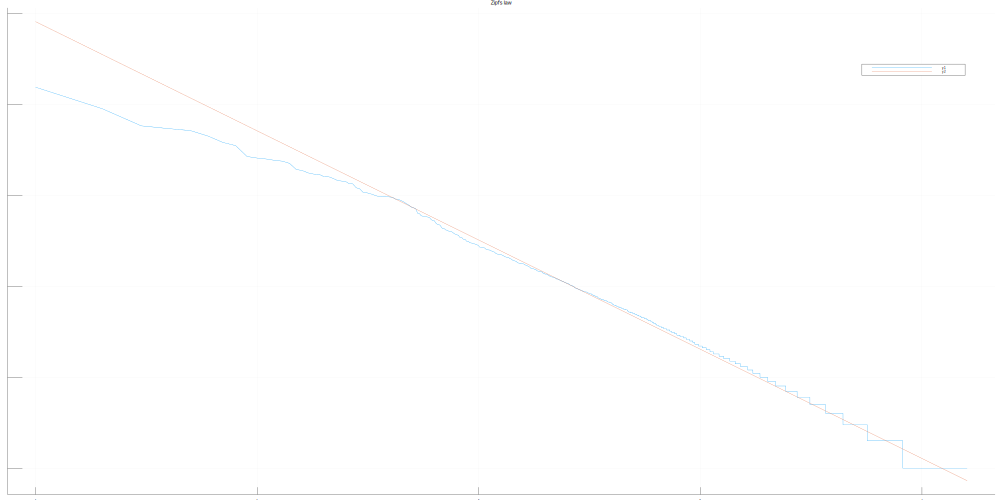

In [17]:
using Plots
Plots.gr()

plot(log10.(r),log10.(f),size=(4000,2000))
plot!(log10.(r),b0 .+ b1*log10.(r),title="Zipf\'s law")

### Markov analysis
A series of random words seldom makes sense because there is no relationship between successive words. For example, in a real sentence you would expect an article like “the” to be followed by an adjective or a noun, and probably not a verb or adverb.

One way to measure these kinds of relationships is Markov analysis, which characterizes, for a given sequence of words, the probability of the words that might come next. For example, the song Eric, the Half a Bee begins:

```
Half a bee, philosophically,
Must, ipso facto, half not be.
But half the bee has got to be
Vis a vis, its entity. D’you see?

But can a bee be said to be
Or not to be an entire bee
When half the bee is not a bee
Due to some ancient injury?
```

In this text, the phrase “half the” is always followed by the word “bee”, but the phrase “the bee” might be followed by either “has” or “is”.

The result of Markov analysis is a mapping from each prefix (like “half the” and “the bee”) to all possible suffixes (like “has” and “is”). suffix)

Given this mapping, you can generate a random text by starting with any prefix and choosing at random from the possible suffixes. Next, you can combine the end of the prefix and the new suffix to form the next prefix, and repeat.

For example, if you start with the prefix “Half a”, then the next word has to be “bee”, because the prefix only appears once in the text. The next prefix is “a bee”, so the next suffix might be “philosophically”, “be” or “due”.

#### Task(s)
* Design an application that takes a text and performs a Markov analysis for a sequence of words. The length $n$ of the sequence should be a variable.
    * You should register not only the possible word to come next, but also its frequency
* Design an application that, for a given sequence, returns the next word, based on the probabilities that you derive from the frequencies (the word should be chosen at random, taking into account the probabilities.
* Use the two tools you just built to generate a random text, based on $n$ starting words of a given length $N$
    * Try it out on the poem, is the result as expected?


In [ ]:
using Pkg
Pkg.add("Distributions")
using Distributions
?Distributions.Categorical()

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`


┌ Warning: Some registries failed to update:
│     — /home/jupyter/.julia/registries/General — failed to fetch from repo
└ @ Pkg.API /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Pkg/src/API.jl:144


 Resolving package versions...


In [32]:
# Texte vers liste chrono
chronolist = readbook("poem.txt")

# Analyse Markov
function markov(list,n=2)
    dic = Dict()
    for i=1:length(list)-n
        key = list[i:i+(n-1)]
        nextword = list[i+n]
        # Ecrire mot & fréquence
        minidic = get!(dic,key,Dict())
        minidic[nextword] = get(minidic,nextword,0)+1
    end
    return dic
end
            
markov(chronolist)

Dict{Any,Any} with 45 entries:
  ["be", "said"]              => Dict{Any,Any}("to"=>1)
  ["dyou", "see"]             => Dict{Any,Any}("but"=>1)
  ["facto", "half"]           => Dict{Any,Any}("not"=>1)
  ["half", "the"]             => Dict{Any,Any}("bee"=>2)
  ["a", "bee"]                => Dict{Any,Any}("due"=>1,"philosophically"=>1,"b…
  ["vis", "a"]                => Dict{Any,Any}("vis"=>1)
  ["not", "be"]               => Dict{Any,Any}("but"=>1)
  ["half", "not"]             => Dict{Any,Any}("be"=>1)
  ["philosophically", "must"] => Dict{Any,Any}("ipso"=>1)
  ["bee", "philosophically"]  => Dict{Any,Any}("must"=>1)
  ["to", "some"]              => Dict{Any,Any}("ancient"=>1)
  ["bee", "be"]               => Dict{Any,Any}("said"=>1)
  ["vis", "its"]              => Dict{Any,Any}("entity"=>1)
  ["not", "a"]                => Dict{Any,Any}("bee"=>1)
  ["not", "to"]               => Dict{Any,Any}("be"=>1)
  ["an", "entire"]            => Dict{Any,Any}("bee"=>1)
  ["a", "vis"]            

In [35]:
function selector(key, markovdic)
    dic = markovdic[key]
    val = collect(values(dic))
    p = val./sum(val)
    dist = Distributions.Categorical(p)
    k = rand(dist)
    return collect(keys(dic))[k]
end

markovdic = markov(chronolist)
a = [selector(["a","bee"],markovdic) for i in 1:100]
length(a[a.=="philosophically"])

ArgumentError: ArgumentError: Package Distributions not found in current path:
- Run `Pkg.add("Distributions")` to install the Distributions package.
